In [1]:
import os
from dotenv import load_dotenv
from typing import TypedDict , Annotated
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph ,START,END



load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

from langchain_groq import ChatGroq
llm=ChatGroq(model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000253A8024DD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000253A909AB70>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [2]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [3]:
api_wrapper=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)

In [4]:
arxiv=ArxivQueryRun(api_wrapper=api_wrapper)

In [5]:
arxiv

ArxivQueryRun(api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=2, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=500))

In [6]:
arxiv.invoke("what is a attention all you need")

'Published: 2018-07-02\nTitle: The Matrix Calculus You Need For Deep Learning\nAuthors: Terence Parr, Jeremy Howard\nSummary: This paper is an attempt to explain all the matrix calculus you need in order\nto understand the training of deep neural networks. We assume no math knowledge\nbeyond what you learned in calculus 1, and provide links to help you refresh\nthe necessary math where needed. Note that you do not need to understand this\nmaterial before you start learning to train and use deep learning'

In [7]:
api_wrapper_wici=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)

In [8]:
wici=WikipediaQueryRun(api_wrapper=api_wrapper_wici)

In [9]:
wici

WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'c:\\Users\\acer\\anacondasomu\\envs\\langgraphx\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=2, lang='en', load_all_available_meta=False, doc_content_chars_max=500))

In [10]:
wici.invoke("what is ml")

'Page: Standard ML\nSummary: Standard ML (SML) is a general-purpose, high-level, modular, functional programming language with compile-time type checking and type inference. It is popular for writing compilers, for programming language research, and for developing theorem provers.\nStandard ML is a modern dialect of ML, the language used in the Logic for Computable Functions (LCF) theorem-proving project. It is distinctive among widely used languages in that it has a formal specification, given as '

In [11]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool=TavilySearchResults()

C:\Users\acer\AppData\Local\Temp\ipykernel_33420\568237837.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool=TavilySearchResults()


In [12]:
tool.invoke("give me recent in aguest open hackthine list in india")

[{'title': 'India Open Hackathon',
  'url': 'https://www.openhackathons.org/s/siteevent/a0CUP00001FSe3d2AD/se000392',
  'content': 'India Open Hackathon. September 18-26, 2025. Application Deadline: August 19, 2025. Hybrid Event. Event Overview. Together with NVIDIA and OpenACC organization',
  'score': 0.986},
 {'title': 'All Hackathons - Reskill',
  'url': 'https://reskilll.com/allhacks',
  'content': 'AINNOVATION_II —2025 · 2025-08-19 · 2025-08-25 ; Innoquest 2025 · 2025-08-04 · 2025-08-25 ; HERE India Hackathon: Women in Tech · 2025-08-04 · 2025-09-30 ; TroubleShoot',
  'score': 0.98568},
 {'title': '2540 Hackathons - Explore Key Challenges - Unstop',
  'url': 'https://unstop.com/hackathons',
  'content': 'Frontend With GenAI · InnoTech 2025 · HackRobo 1.0 · HackVriksh 2025 - Code.Create.Cultivate · The Empathy Encryption Hackathon · Aditya Birla Group Stratos 2025.',
  'score': 0.98292},
 {'title': 'Odoo Hackathon 2025',
  'url': 'https://www.odoo.com/event/odoo-hackathon-2025-764

In [13]:
tools=[arxiv,wici,tool]

In [14]:
llm_with_tool=llm.bind_tools(tools)

In [ ]:
from langchain_core.messages import HumanMessage
llm_with_tool.invoke("who is win test match ind vs eng test")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'rkxh4c3y1', 'function': {'arguments': '{"query":"who won the test match india vs england"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 1289, 'total_tokens': 1383, 'completion_time': 0.170909091, 'prompt_time': 0.024635928, 'queue_time': 0.256333813, 'total_time': 0.195545019}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--76b60f44-8cfc-48cf-b63d-a285d28c6f27-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'who won the test match india vs england'}, 'id': 'rkxh4c3y1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1289, 'output_tokens': 94, 'total_tokens': 1383})

In [19]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,List
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [31]:
class state(TypedDict):
    messages:Annotated[List[AnyMessage],add_messages]

def chatbot(state:state):
    return{'messages':[llm_with_tool.invoke(state['messages'])]}


In [32]:
graph=StateGraph(state)
graph.add_node('chatbot',chatbot)
graph.add_node('tools',ToolNode(tools))
graph.add_edge(START,'chatbot')
graph.add_conditional_edges(
    'chatbot',
    tools_condition
)
graph.add_edge('tools',END)
workflow=graph.compile()

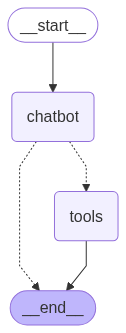

In [33]:
workflow

In [34]:
workflow.invoke({'messages':'who is win test match ind vs eng test'})

{'messages': [HumanMessage(content='who is win test match ind vs eng test', additional_kwargs={}, response_metadata={}, id='3f61b39b-4cf4-4e07-a096-ff05832ff767'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wpftwqrxm', 'function': {'arguments': '{"query":"who won the india vs england test match"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 1289, 'total_tokens': 1383, 'completion_time': 0.170909091, 'prompt_time': 0.024453232, 'queue_time': 0.247740567, 'total_time': 0.195362323}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--6f715cd1-7325-458c-9a1d-eff7ae5acb27-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'who won the india vs england test match'}, 'id': 'wpftwqrxm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1289, 'out